<a href="https://colab.research.google.com/github/louispaulet/pattern_mining_course/blob/main/DataMining_HW1_Tree_Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we load the libraries we will need for reading and formatting the input data (pandas for the dataframe structure, train_test_split from sklearn to split the data into test and training sets). 
Then we load DecisionTreeClassifier from Sklearn to use the decision tree model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

The loaded data is parsed like a csv file into a pandas dataframe structure

In [ ]:
df = pd.read_csv('Mushrooms.01.txt', sep="	", encoding='latin-1')  #invisible separator is some kind of utf arrow in the source file
df

,Id,Odorant,Anneaux,Chapeau bombé,Pied large,Tâches,Comestible
0,champignon 1,1,0,1,1,0,1
1,champignon 2,1,0,1,1,1,1
2,champignon 3,0,0,1,1,1,1
3,champignon 4,1,0,0,1,1,0
4,champignon 5,0,0,1,1,0,1
5,champignon 6,1,0,1,1,0,1
6,champignon 7,0,0,1,1,0,1
7,champignon 8,1,1,0,1,0,1
8,champignon 9,0,0,1,1,0,0
9,champignon 10,1,1,1,1,0,1


We then isolate the label "Comestible" as the desired predictions "y" : 

In [ ]:
y = df.Comestible #these are the labels we want to predict
y

0     1
1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    1
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    0
Name: Comestible, dtype: int64

Here, we drop useless input columns from our dataset x.

In [ ]:
x = df.drop("Comestible", axis=1) #this is the input data, so we remove the "truth" column (now stored in "y" variable)
x = x.drop("Id", axis=1) #the id is useless as we already have ids and it is not a mushroom caracteristic
x

,Odorant,Anneaux,Chapeau bombé,Pied large,Tâches
0,1,0,1,1,0
1,1,0,1,1,1
2,0,0,1,1,1
3,1,0,0,1,1
4,0,0,1,1,0
5,1,0,1,1,0
6,0,0,1,1,0
7,1,1,0,1,0
8,0,0,1,1,0
9,1,1,1,1,0


Our data has been cleaned up and separated into x (inputs) and y (desired outputs). We must split it for cross-validation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #separate the data into train and test variables

Our clean mushroom data is then used to fit the decision tree

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

We then display the decision tree

[Text(167.4, 195.696, 'X[1] <= 0.5\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(103.01538461538462, 152.208, 'X[2] <= 0.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(51.50769230769231, 108.72, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(25.753846153846155, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(77.26153846153846, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(154.52307692307693, 108.72, 'X[3] <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(128.76923076923077, 65.232, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(103.01538461538462, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(154.52307692307693, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(180.27692307692308, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(231.7846153846154, 152.208, 'X[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(206.03076923076924, 108.72, 'gini = 0.0\nsamples = 1\nvalue =

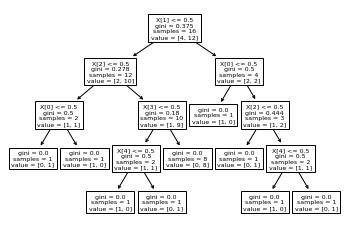

In [ ]:
from sklearn import tree
tree.plot_tree(clf) 

In [ ]:
print("We compare the predicted with true results : ")
print("Predicted : " + str(clf.predict(X_test)) + " \n Truth :    "  + str(y_test.values))

We compare the predicted with true results : 
Predicted : [1 1 1 0 0 1 1 1] 
 Truth :    [1 1 0 0 1 1 1 1]


In [ ]:
percentage = clf.score(X_test, y_test)
percentage

0.75

We can then show a confusion matrix : in this case, we have a lot of predictions falling outside of the diagonal, which indicate a low accuracy (as the accuracy score confirms).

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, clf.predict(X_test)) #create a confusion matrix to display TN/TP/FP/FN
print("Confusion Matrix : ")
print(res)
print(f"Test Set : {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix : 
[[1 1]
 [1 5]]
Test Set : 8
Accuracy = 75.0 %


The decision tree gives worse results than the SVM as the split between test and train samples is decisive in the tree classifier structure fitting process. Depending on this split, the accuracy varies between 30% and 85%. This indicates an unbalanced dataset (not enough poisonous mushrooms) and not enough data. If we run this notebook several times, we can emultate a ksplit validation and observe that the variance is too high.